In [39]:
import warnings

import numpy as np

from HW1.gradient_descent import gradient_descent
from HW1.visualize import draw_2D, draw_3D

# Example 1

> $dim = 1$.
>
> $f(x) = {x^4 \over 1e7}$

In [40]:
def f(coord):
    return (coord[0] ** 4) / 1e7

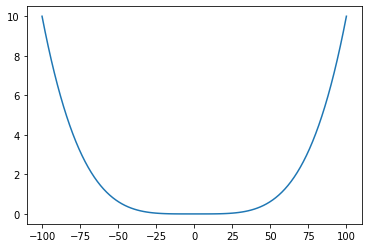

In [41]:
draw_2D(f)

[-23.40088646] 0.02998673885900858
{'gradient_call_count': 10000, 'function_call_count': 10000, 'points': array([[array([-31.21783949]), 0.09497545293569286],
       [array([-31.21662255]), 0.09496064441597207],
       [array([-31.21540576]), 0.09494583935945314],
       ...,
       [array([-23.40242438]), 0.02999462264794868],
       [array([-23.40191171]), 0.029991994372880075],
       [array([-23.40139907]), 0.02998936644325356]], dtype=object)}


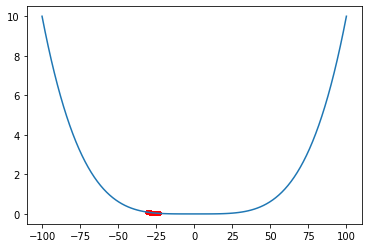

In [42]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    (x, y), meta = gradient_descent(f, 1)
    print(x, y)
    print(meta)

    draw_2D(f, meta["points"])

# Example 2

> $dim = 2$.
>
> $f(x, y) = sin(x / 20) * cos(e + y / 20)$

In [43]:
def f(coord):
    return np.sin(coord[0] / 20) * np.cos(np.e + coord[1] / 20)

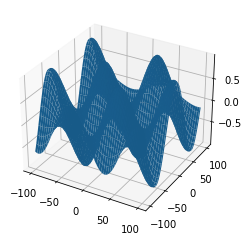

In [44]:
draw_3D(f)

[31.08181503  8.3346907 ] -0.9998388444227083
{'gradient_call_count': 2090, 'function_call_count': 2091, 'points': array([[array([2.97405693, 0.47535645]), -0.1364865295581327],
       [array([3.01505517, 0.47794989]), -0.13836143388782132],
       [array([3.05604299, 0.48057801]), -0.14023558645920606],
       ...,
       [array([31.08030654,  8.33409692]), -0.9998373860012473],
       [array([31.08106164,  8.33439414]), -0.9998381168541589],
       [array([31.08181503,  8.3346907 ]), -0.9998388444227083]],
      dtype=object)}


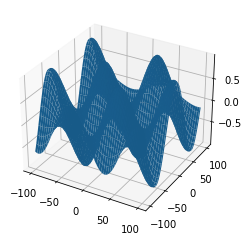

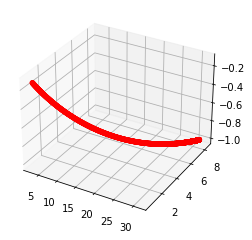

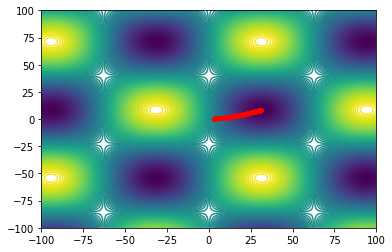

In [45]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    (xs, y), meta = gradient_descent(f, 2, lr=0.9)
    print(xs, y)
    print(meta)

    draw_3D(f, meta["points"])